# Importación de datos y librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle

url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


- La columna de fecha está en string, por lo que hay que convertirla a un formato datetime

In [5]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

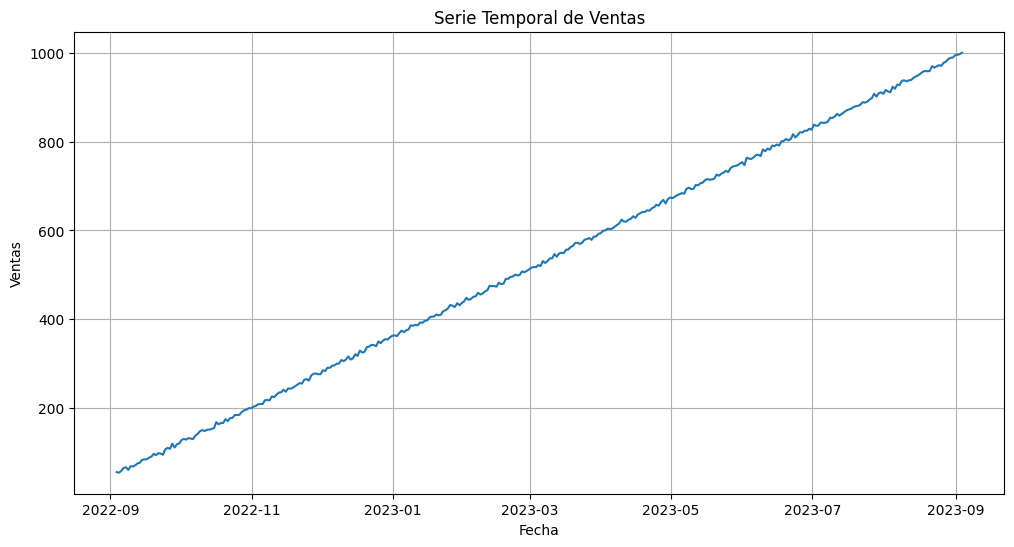

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df["sales"])
plt.title("Serie Temporal de Ventas")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

- Se puede apreciar una tendencia creciente 
- La serie no es estacionaria
- Y puedo ver que tiene una variabilidad, aunque sea pequeña hay ciertas diferencias que hacen la serie variable
- Y el tensor es diario porque cada punto de dato representa un día

# Entrenamiento de la serie con modelo ARIMA

In [8]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[0:train_size], df[train_size:]

- El orden son parámetros comunes para entrenar un modelo ARIMA

In [10]:
orden = (5, 1, 0)

modelo = ARIMA(train_data["sales"], order=orden)
modelo_fit = modelo.fit()

/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vscode/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


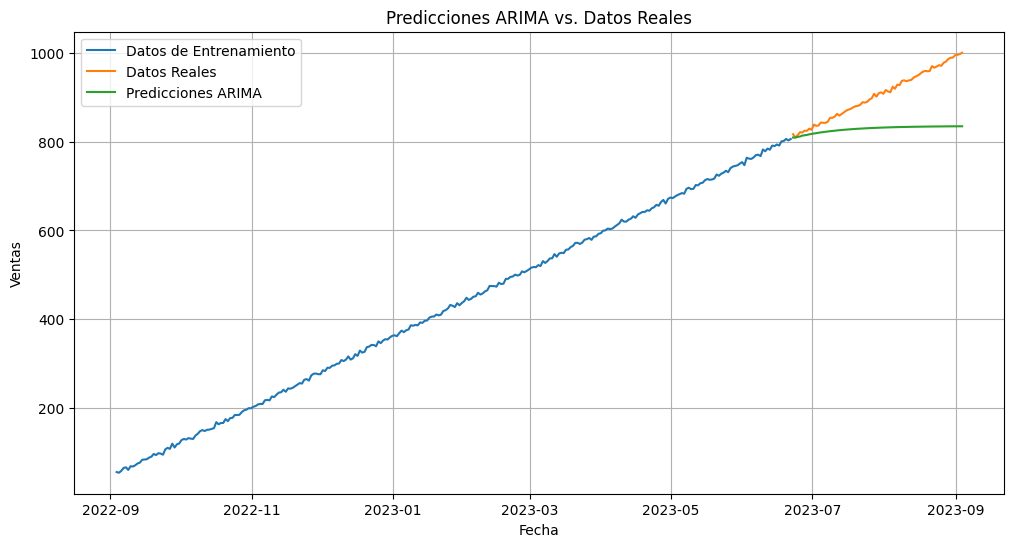

In [12]:
predicciones = modelo_fit.predict(start=len(train_data), end=len(df)-1)

plt.figure(figsize=(12, 6))
plt.plot(train_data["sales"], label="Datos de Entrenamiento")
plt.plot(test_data["sales"], label="Datos Reales")
plt.plot(predicciones, label="Predicciones ARIMA")
plt.title("Predicciones ARIMA vs. Datos Reales")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
rmse = np.sqrt(mean_squared_error(test_data["sales"], predicciones))
rmse

np.float64(90.80968267291539)

- En la gráfica vemos que la predicción si tiene un error medio cuadrático elevado y se puede ver representado de manera clara ya que las predicciones se "estancan" y no siguen siendo exponenciales

In [15]:
filename = "modelo_arima.pkl"
with open(filename, "wb") as file:
    pickle.dump(modelo_fit, file)